In [331]:
# Question 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

# Import data into Pandas Data Frame
data = pd.read_csv('regression.csv', header=None, names=['A','B','C'])
data

,A,B,C
0,0.490,-0.180,11.50
1,-1.410,-1.230,11.80
2,0.943,4.510,-3.24
3,3.570,5.070,-23.90
4,-1.700,6.910,-22.10
...,...,...,...
295,6.920,-0.421,33.20
296,11.700,-1.290,108.00
297,9.920,3.690,-126.00
298,11.400,6.290,-315.00


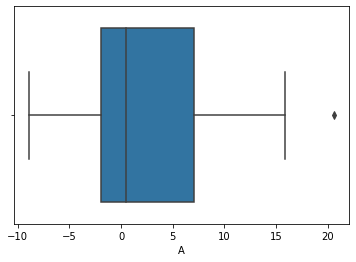

In [332]:
# Explore the data

sns.boxplot(x=data['A'])

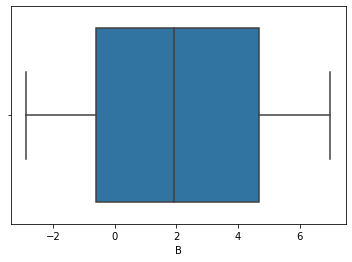

In [333]:
sns.boxplot(x=data['B'])

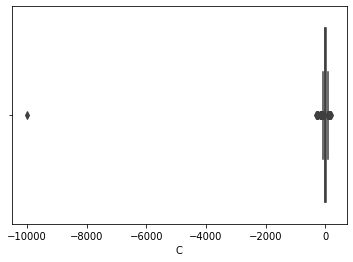

In [334]:
sns.boxplot(x=data['C'])
# Found outliner with boxplot

In [335]:
# Remove outliners.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 3 * IQR)) | (data > (Q3 + 3 * IQR))).any(axis=1)]
data.shape

(278, 3)

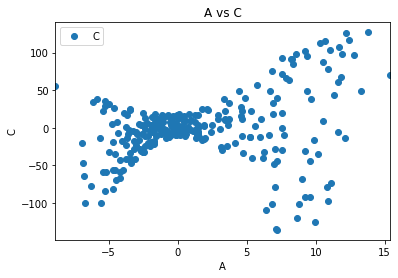

In [336]:
data.plot(x='A', y='C', style='o')  
plt.title('A vs C')  
plt.xlabel('A')  
plt.ylabel('C')  
plt.show()
# Heteroscedasticity needs to be addressed.

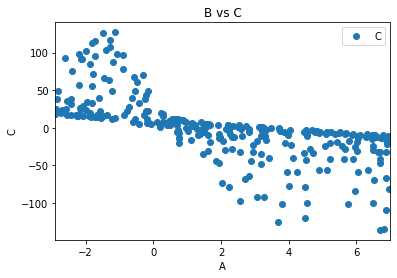

In [337]:
data.plot(x='B', y='C', style='o')  
plt.title('B vs C')  
plt.xlabel('A')  
plt.ylabel('C')  
plt.show()
# Heteroscedasticity needs to be addressed.

/Users/shengchengchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


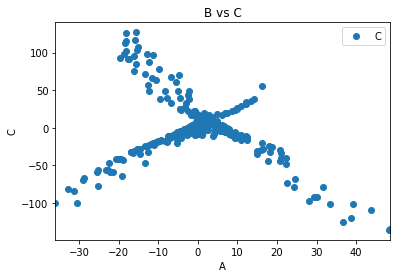

In [338]:
data['A*B'] = data['A'] * data['B']
data.plot(x='A*B', y='C', style='o')  
plt.title('B vs C')  
plt.xlabel('A')  
plt.ylabel('C')  
plt.show()

In [339]:
data['|A|*B'] = data['A'].abs() * data['B']
del data['A*B']
data

/Users/shengchengchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,A,B,C,|A|*B
0,0.490,-0.180,11.50,-0.08820
1,-1.410,-1.230,11.80,-1.73430
2,0.943,4.510,-3.24,4.25293
3,3.570,5.070,-23.90,18.09990
4,-1.700,6.910,-22.10,11.74700
...,...,...,...,...
292,7.230,6.690,-136.00,48.36870
295,6.920,-0.421,33.20,-2.91332
296,11.700,-1.290,108.00,-15.09300
297,9.920,3.690,-126.00,36.60480


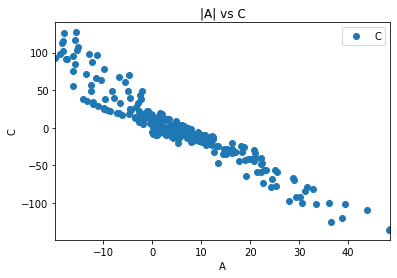

In [340]:
data.plot(x='|A|*B', y='C', style='o')  
plt.title('|A| vs C')  
plt.xlabel('A')  
plt.ylabel('C')  
plt.show()
# Linear relationship between 

In [341]:
# Random shuffle the dataset for train test split.
data = data.iloc[np.random.RandomState(seed=42).permutation(len(data))] #.reset_index(drop=True)
data

,A,B,C,|A|*B
30,-2.81,-0.0679,4.81,-0.190799
126,-3.97,6.3300,-56.80,25.130100
199,-4.43,-0.5990,7.63,-2.653570
142,-5.82,-2.4400,38.70,-14.200800
269,9.39,-1.7200,94.80,-16.150800
...,...,...,...,...
188,-3.54,5.6200,-42.10,19.894800
71,3.61,1.6900,3.36,6.100900
106,4.66,-0.2260,22.00,-1.053160
289,7.13,6.8200,-135.00,48.626600


In [342]:
# Split the data set to 70% training and 30% testing
data_train = data.head(int(len(data)*0.7)).reset_index()
data_test = data.tail(len(data)-int(len(data)*0.7)).reset_index()
print(data_train)
print(data_test)

     index       A       B      C      |A|*B
0       30 -2.8100 -0.0679   4.81  -0.190799
1      126 -3.9700  6.3300 -56.80  25.130100
2      199 -4.4300 -0.5990   7.63  -2.653570
3      142 -5.8200 -2.4400  38.70 -14.200800
4      269  9.3900 -1.7200  94.80 -16.150800
..     ...     ...     ...    ...        ...
189    153 -0.3030 -1.7100  14.60  -0.518130
190     23 -5.2700 -2.0900  28.90 -11.014300
191    238  7.0100  3.1800 -48.20  22.291800
192    233  7.0500  4.4800 -78.40  31.584000
193     81  0.0713  5.6900  -6.93   0.405697

[194 rows x 5 columns]
    index       A      B       C     |A|*B
0      39  -0.409  2.500    1.53   1.02250
1     201  10.700 -1.710  115.00 -18.29700
2     265   5.260  2.370  -12.80  12.46620
3      47   2.170 -1.990   24.10  -4.31830
4      94  -2.180  3.290  -10.50   7.17220
..    ...     ...    ...     ...       ...
79    188  -3.540  5.620  -42.10  19.89480
80     71   3.610  1.690    3.36   6.10090
81    106   4.660 -0.226   22.00  -1.05316
82    

In [343]:
# Train the regression model.
X = data_train.drop('C', axis=1).values
y = data_train['C'].values
ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
X = np.concatenate((ones, X),axis=1)

# Solve the coefficients for ordinary least square regression.
beta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(beta)

[ 1.18478845e+01  1.45314711e-03  1.96248283e+00  7.09852620e-01
 -3.37211710e+00]


In [344]:
beta0 = beta[0]
beta_coeff = beta[1:]
rows, _ = data_train.shape
y_pred = []
A_abs_B = data_train.drop('C', axis=1)

# Make predictions
for row in range(rows):
    y_pred.append(beta0 + beta_coeff.dot(A_abs_B.values[row, :]))
data_train['C_pred'] = np.ravel(y_pred)

# Reorder columns
data_train = data_train[['A', 'B', '|A|*B', 'C', 'C_pred']]
data_train

,A,B,|A|*B,C,C_pred
0,-2.8100,-0.0679,-0.190799,4.81,6.972100
1,-3.9700,6.3300,25.130100,-56.80,-76.008349
2,-4.4300,-0.5990,-2.653570,7.63,11.966209
3,-5.8200,-2.4400,-14.200800,38.70,46.787301
4,9.3900,-1.7200,-16.150800,94.80,83.907937
...,...,...,...,...,...
189,-0.3030,-1.7100,-0.518130,14.60,12.008931
190,-5.2700,-2.0900,-11.014300,28.90,37.196940
191,7.0100,3.1800,22.291800,-48.20,-46.962490
192,7.0500,4.4800,31.584000,-78.40,-77.302835


In [345]:
# Coefficient of Determination.
# Compute Sum of Sqaured Error and Sum of Sqaured Total.
SSE = ((data_train['C_pred'] - data_train['C'])**2).sum()
SST = ((data_train['C'] - data_train['C'].mean())**2).sum()
# Compute r squared to measure performance.
r_sq = 1 - SSE/SST
print(r_sq)
# R squared for training set is high.

0.9384794124804481


In [346]:
rows, _ = data_test.shape
y_pred = []
A_abs_B = data_test.drop('C', axis=1)

# Make predictions.
for row in range(rows):
    y_pred.append(beta0 + beta_coeff.dot(A_abs_B.values[row, :]))
data_test['C_pred'] = np.ravel(y_pred)

SSE = ((data_test['C_pred'] - data_test['C'])**2).sum()
SST = ((data_test['C'] - data_test['C'].mean())**2).sum()
# Compute r squared to measure performance.
osr_sq = 1 - SSE/SST
print(osr_sq)

0.9359914968357479


In [347]:
# The out of sameple R^2 (test set) is 0.936 which is only slightly lower than training set R^2
# Therefore, overfitting is NOT a major issue for the model.
# 0.936 OS-R^2 is high, thus C can be predicted by A and B.